# CRQ1

In [1]:
import pandas as pd
import math

### only shots and free kicks can generate a goal

In [2]:
events_england = pd.read_json('C:\\Users\\Gabriele\\Desktop\\datasets\\events_england.json')

# taking only free kicks and shots events
events_england = events_england.loc[events_england['eventName'].isin(['Shot','Free Kick'])]
events_england = events_england.loc[events_england['subEventName'].isin(['Free kick shot','Penalty', 'Shot'])]
events_england = events_england.reset_index(drop=True)


In [3]:
# creating a new column 'status' which says if the event is a goal or not
d = {'id': 101}

l_tags = events_england['tags']
status = []

for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no goal')
    else:
        status.append('goal')

events_england['status'] = status # add the column

del events_england['tags']


### only goals

In [4]:
events_england = events_england.loc[events_england['status'] == 'goal']
events_england = events_england.reset_index(drop=True)


In [5]:
# creating a new column called 'period':
# period --> tranforming the continuous variable 'secEvent' in a discrete variable 'period' (period of the mathc ex: [0, 9)

In [6]:
period = []
event_sec = events_england['eventSec']
match_period = events_england['matchPeriod']

for i in range(len(event_sec)):
    
    if match_period[i] == '1H':
        
        if event_sec[i] < 540:
            period.append('0-9')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('9-18')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('18-27')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('27-36')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('36-45')
        elif event_sec[i] >= 2700:
            period.append('45+')
        
    if match_period[i] == '2H':
        
        if event_sec[i] < 540:
            period.append('45-54')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('54-63')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('63-72')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('72-81')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('81-90')
        elif event_sec[i] >= 2700:
            period.append('90+')
            
 # adding the column
events_england['period'] = period

events_england = events_england.reset_index(drop=True)
events_england



,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,teamId,status,period
0,10,Shot,94.595788,177959212,2499719,1H,25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",100,Shot,1609,goal,0-9
1,10,Shot,254.745027,177959280,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",100,Shot,1631,goal,0-9
2,10,Shot,1710.855093,177959759,2499719,1H,12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",100,Shot,1631,goal,27-36
3,10,Shot,2815.900791,177960130,2499719,1H,7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",100,Shot,1609,goal,45+
4,10,Shot,634.312236,177960379,2499719,2H,12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",100,Shot,1631,goal,54-63
5,10,Shot,2231.119656,177960849,2499719,2H,7870,"[{'y': 63, 'x': 94}, {'y': 0, 'x': 0}]",100,Shot,1609,goal,81-90
6,10,Shot,2374.620655,177960902,2499719,2H,26010,"[{'y': 44, 'x': 91}, {'y': 0, 'x': 0}]",100,Shot,1609,goal,81-90
7,10,Shot,1455.304065,178148575,2499720,2H,8325,"[{'y': 55, 'x': 89}, {'y': 100, 'x': 100}]",100,Shot,1625,goal,63-72
8,10,Shot,1394.017200,178122511,2499721,1H,9127,"[{'y': 52, 'x': 87}, {'y': 100, 'x': 100}]",100,Shot,1646,goal,18-27
9,10,Shot,2318.473517,178122911,2499721,1H,8433,"[{'y': 24, 'x': 91}, {'y': 100, 'x': 100}]",100,Shot,1646,goal,36-45


### barplot with the absolute frequency of goals in all the time slots

In [7]:
import matplotlib.pyplot as plt
import numpy as np

periods = ['0-9', '9-18', '18-27', '27-36', '36-45', '45+', '45-54', '54-63', '63-72', '72-81', '81-90', '90+']
frequency = []

for i in periods:
    num = events_england[events_england['period'] == i]
    frequency.append(len(num))
   

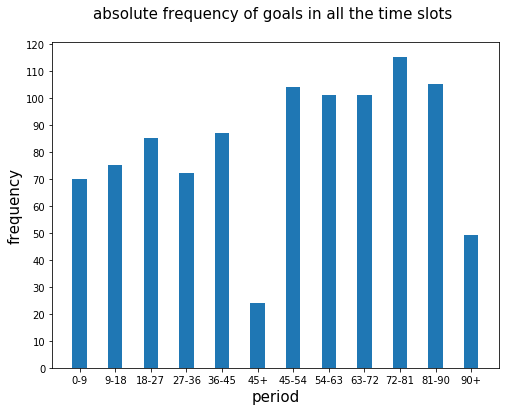

In [16]:
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

plt.figure(figsize=(8,6))

plt.bar(x, frequency)   
plt.xticks(x, periods)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.title('absolute frequency of goals in all the time slots \n', fontsize=15)
plt.xlabel('period', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.show()



### find the top 10 teams that score the most in the interval "81-90"

In [37]:
# taking only the events in the '81-90' period

last_min = events_england[events_england['period'] == '81-90']
last_min = last_min.reset_index(drop=True)


In [38]:
# only premier league's teams

teams = pd.read_json('C:\\Users\\Gabriele\\Desktop\\datasets\\teams.json')

for i in range(len(teams)):

    if teams.loc[i, 'type'] != 'club':  # not national
        teams = teams.drop(i)

    elif teams.loc[i, 'area']['name'] != 'England' and teams.loc[i, 'area']['name'] != 'Wales': # swansea is in wales
        teams = teams.drop(i)

teams = teams.reset_index(drop=True)


### dict with key = team and value = number of gol in '81-90' period

In [39]:
team_lastmin = {} # dict

for i in range(len(teams)):
    count = last_min[last_min['teamId'] == teams.loc[i, 'wyId']] # every goal in 81-90 period of one team
    team_lastmin[teams.loc[i, 'name']] = len(count)   # number of goal of that team
    

In [40]:
team_lastmin = sorted(team_lastmin.items(), key=lambda x: x[1], reverse=True) #sort the dict by values

team_lastmin[0:10] # top 10 teams that score the most in the interval "81-90"


[('Manchester City', 13),
 ('Arsenal', 11),
 ('Chelsea', 9),
 ('Manchester United', 9),
 ('Watford', 7),
 ('Crystal Palace', 7),
 ('Liverpool', 7),
 ('West Ham United', 6),
 ('AFC Bournemouth', 5),
 ('Tottenham Hotspur', 5)]

### show if there are players that were able to score at least one goal in 8 different intervals

In [45]:
players = pd.read_json('C:\\Users\\Gabriele\\Desktop\\datasets\\players.json')

# take only the premier league's player
teamsId = list(teams['wyId'])

for i in range(len(players)):
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)

In [46]:
players_eight_period = [] # list with players that were able to score at least one goal in different intervals

for i in range(len(players)):
    count = 0
    player_goal = events_england[events_england['playerId'] == players.loc[i, 'wyId']] # all goal of a player
    
    if '0-9' in list(player_goal['period']):
        count += 1
    if '9-18' in list(player_goal['period']):
        count += 1
    if '18-27' in list(player_goal['period']):
        count += 1
    if '27-36' in list(player_goal['period']):
        count += 1
    if '36-45' in list(player_goal['period']):
        count += 1
    if 'E1' in list(player_goal['period']):
        count += 1
    if '45-54' in list(player_goal['period']):
        count += 1
    if '54-63' in list(player_goal['period']):
        count += 1
    if '63-72' in list(player_goal['period']):
        count += 1
    if '72-81' in list(player_goal['period']):
        count += 1
    if '81-90' in list(player_goal['period']):
        count += 1
    if 'E2' in list(player_goal['period']):
        count += 1
    # at least 8 different periods    
    if count >= 8:
        players_eight_period.append(players.loc[i, 'shortName'])

players_eight_period


['R. Lukaku',
 'H. Kane',
 'R. Sterling',
 'Gabriel Jesus',
 'J. Vardy',
 'Roberto Firmino',
 'Mohamed Salah',
 '\\u00c1lvaro Morata',
 'M. Arnautovi\\u0107',
 'A. Lacazette',
 'W. Zaha',
 'R. Mahrez']